In [1]:
import os  
import pandas as pd  
from tqdm import tqdm
import gseapy as gp
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import os, re
import seaborn as sns
from scipy.stats import kstest
from scipy import stats
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)
sns.set(font_scale=1.5)
sns.set_style("white")

# all CHIPI

In [2]:
def read_txt_to_dict(file_path):
    result_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split('\t')

            if len(elements) >= 2:
                key = elements[0]
                values = [elem for elem in elements[1:] if elem]
                result_dict[key] = values
    return result_dict

In [3]:
GO_CC_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Cellular_Component_2023.txt')
GO_BP_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Biological_Process_2023.txt')
GO_MF_23=read_txt_to_dict('/home2/zhenglijing/work/GO/GO_Molecular_Function_2023.txt')


In [4]:
resultdf=pd.read_csv('testsignificant_GO')

In [5]:
resultdf

,Unnamed: 0,geneloci,indicator,p_value
0,29,chr1-16976032-16976032-A-C-MST1P2,组织转麸胺酶抗体,0.023558
1,34,chr1-16976032-16976032-A-C-MST1P2,胰弹性蛋白酶,0.048116
2,60,chr7-48886193-48886193-G-A-ABCA13,解连蛋白,0.002345
3,84,chr15-21937964-21937964-A-G-LOC646214,麦胶蛋白抗体,0.012301
4,102,chr1-120539213-120539213-G-T-NOTCH2NLC,解连蛋白,0.037756
...,...,...,...,...
483,9467,chr1-145304787-145304787-G-T-NBPF25P,1. 己二酸,0.003685
484,9468,chr1-145304787-145304787-G-T-NBPF25P,2. 辛二酸,0.046450
485,9469,chr1-145304787-145304787-G-T-NBPF25P,3. 乙基丙二酸,0.015724
486,9477,chr1-145304787-145304787-G-T-NBPF25P,11. 琥珀酸,0.021162


In [6]:
resultdf['loc']=[i.split('-')[0]+'-'+i.split('-')[1] for i in list(resultdf['geneloci'])]

In [10]:
resultdf

,Unnamed: 0,geneloci,indicator,p_value,loc
0,29,chr1-16976032-16976032-A-C-MST1P2,组织转麸胺酶抗体,0.023558,chr1-16976032
1,34,chr1-16976032-16976032-A-C-MST1P2,胰弹性蛋白酶,0.048116,chr1-16976032
2,60,chr7-48886193-48886193-G-A-ABCA13,解连蛋白,0.002345,chr7-48886193
3,84,chr15-21937964-21937964-A-G-LOC646214,麦胶蛋白抗体,0.012301,chr15-21937964
4,102,chr1-120539213-120539213-G-T-NOTCH2NLC,解连蛋白,0.037756,chr1-120539213
...,...,...,...,...,...
483,9467,chr1-145304787-145304787-G-T-NBPF25P,1. 己二酸,0.003685,chr1-145304787
484,9468,chr1-145304787-145304787-G-T-NBPF25P,2. 辛二酸,0.046450,chr1-145304787
485,9469,chr1-145304787-145304787-G-T-NBPF25P,3. 乙基丙二酸,0.015724,chr1-145304787
486,9477,chr1-145304787-145304787-G-T-NBPF25P,11. 琥珀酸,0.021162,chr1-145304787


In [11]:
OR=OR.drop_duplicates('loc')

NameError: name 'OR' is not defined

In [12]:
OR.sort_values('OR')

NameError: name 'OR' is not defined

In [13]:
resultdf

,Unnamed: 0,geneloci,indicator,p_value,loc
0,29,chr1-16976032-16976032-A-C-MST1P2,组织转麸胺酶抗体,0.023558,chr1-16976032
1,34,chr1-16976032-16976032-A-C-MST1P2,胰弹性蛋白酶,0.048116,chr1-16976032
2,60,chr7-48886193-48886193-G-A-ABCA13,解连蛋白,0.002345,chr7-48886193
3,84,chr15-21937964-21937964-A-G-LOC646214,麦胶蛋白抗体,0.012301,chr15-21937964
4,102,chr1-120539213-120539213-G-T-NOTCH2NLC,解连蛋白,0.037756,chr1-120539213
...,...,...,...,...,...
483,9467,chr1-145304787-145304787-G-T-NBPF25P,1. 己二酸,0.003685,chr1-145304787
484,9468,chr1-145304787-145304787-G-T-NBPF25P,2. 辛二酸,0.046450,chr1-145304787
485,9469,chr1-145304787-145304787-G-T-NBPF25P,3. 乙基丙二酸,0.015724,chr1-145304787
486,9477,chr1-145304787-145304787-G-T-NBPF25P,11. 琥珀酸,0.021162,chr1-145304787


In [14]:
resultdf=resultdf.reset_index()

In [15]:
resultdf['gene']=resultdf['geneloci'].str.split('-',expand=True)[5]

In [16]:
significantdf3=pd.read_csv('gut.csv')
significantdf4=pd.read_csv('immune.csv')
antistressdf=pd.read_csv('antistress.csv')
stressdf=pd.read_csv("stress.csv")
acid_up=pd.read_csv('acid_up.csv')
acid_down=pd.read_csv('acid_down.csv')

In [17]:
dfls=[significantdf3,significantdf4,stressdf,antistressdf,acid_up,acid_down]

In [18]:
significantdf3

,Unnamed: 0,geneloci,indicator,p_value
0,0,chr1-143743325-143743325-C-A-LINC01138,麦胶蛋白抗体,0.777886
1,1,chr1-143743325-143743325-C-A-LINC01138,组织转麸胺酶抗体,0.351027
2,2,chr1-143743325-143743325-C-A-LINC01138,分泌型免疫球蛋白,0.240026
3,3,chr1-143743325-143743325-C-A-LINC01138,钙卫蛋白,0.746079
4,4,chr1-143743325-143743325-C-A-LINC01138,解连蛋白,0.111013
...,...,...,...,...
1605,1605,chr1-144994902-144994902-G-A-LOC100996724,分泌型免疫球蛋白,0.242978
1606,1606,chr1-144994902-144994902-G-A-LOC100996724,钙卫蛋白,0.717940
1607,1607,chr1-144994902-144994902-G-A-LOC100996724,解连蛋白,0.440319
1608,1608,chr1-144994902-144994902-G-A-LOC100996724,葡萄糖醛酸酶,0.180626


In [19]:
targetls=['gut','immune','stress','antistress','acid_up','acid_down']

In [20]:
for i,label in enumerate(targetls):
    
    df=dfls[i][dfls[i]['p_value']<0.05]
    
    cls=label
    df['gene']=df['geneloci'].str.split('-',expand=True)[5]
    gene_list=list(df['gene'].unique())
    gene_sets=[GO_BP_23,GO_CC_23,GO_MF_23]
    print(len(gene_list))
    enr = gp.enrich(gene_list=gene_list,
                                 gene_sets=gene_sets,
                                 outdir='/home2/zhenglijing/work_0511/GO/'+str(cls)+'/',
                                 cutoff=1 # test dataset, use lower value from range(0,1)
                                )

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


47


/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


60
35
30
107
95


In [21]:
dfgut=pd.read_csv("/home2/zhenglijing/work_0511/GO/gut/gs_ind_0.human.enrichr.reports.txt")

In [22]:
dfgut

,Gene_set\tTerm\tOverlap\tP-value\tAdjusted P-value\tOdds Ratio\tCombined Score\tGenes
0,gs_ind_0\tAcute Inflammatory Response (GO:0002...
1,gs_ind_0\tAmide Transport (GO:0042886)\t1/32\t...
2,gs_ind_0\tCell Junction Organization (GO:00343...
3,gs_ind_0\tCell-Cell Junction Organization (GO:...
4,gs_ind_0\tCellular Response To Growth Factor S...
...,...
92,gs_ind_0\tResponse To Transforming Growth Fact...
93,gs_ind_0\tRetina Homeostasis (GO:0001895)\t1/3...
94,gs_ind_0\tSpindle Assembly (GO:0051225)\t1/81\...
95,gs_ind_0\tSubstantia Nigra Development (GO:002...


In [23]:
listt=['Positive Regulation Of Cell Adhesion (GO:0045785) ','Negative Regulation Of Oxidoreductase Activity (GO:0051354)','Macrophage Chemotaxis (GO:0048246) ',
      'Macrophage Migration (GO:1905517)','Regulation Of Interleukin-1 Production (GO:0032652) ','Positive Regulation Of Pyruvate Dehydrogenase Activity (GO:1904184)',
      'Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)','Dermatan Sulfate Metabolic Process (GO:0030205)','Monosaccharide Biosynthetic Process (GO:0046364)',
      'Regulation Of Exit From Mitosis (GO:0007096)','Negative Regulation Of Inflammatory Response (GO:0050728)','Negative Regulation Of Defense Response (GO:0031348)',
      'Negative Regulation Of Chemokine Production (GO:0032682)','Negative Regulation Of Type II Interferon Production (GO:0032689)','Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071637)',
      'Regulation Of Cytokine Production (GO:0001817)','Regulation Of Interleukin-6 Production (GO:0032675)','Response To Calcium Ion (GO:0051592)','Stress-Activated MAPK Cascade (GO:0051403)',
      'Vesicle Cargo Loading (GO:0035459)']

In [24]:
len(listt)

20

In [25]:
termls=[]
termdict={}
for i in targetls:
    cls=str(i)
    path='/home2/zhenglijing/work_0511/GO/'+cls+'/gs_ind_0.human.enrichr.reports.txt'
    df=pd.read_csv(path,sep='\t')
    df=df.sort_values('P-value')
    df1=df[df['P-value']<0.05].iloc[:15,:]
    
    termls.extend(df1['Term'].tolist())
    termdict[i]=df1['Term'].tolist()

In [26]:
termdict

{'gut': ['Positive Regulation Of Cell Adhesion (GO:0045785)',
  'Negative Regulation Of Oxidoreductase Activity (GO:0051354)',
  'Macrophage Chemotaxis (GO:0048246)',
  'Macrophage Migration (GO:1905517)',
  'Positive Regulation Of Integrin-Mediated Signaling Pathway (GO:2001046)',
  'Regulation Of Oxidoreductase Activity (GO:0051341)',
  'Regulation Of Exit From Mitosis (GO:0007096)',
  'Ceramide Transport (GO:0035627)',
  'Regulation Of Interleukin-1 Production (GO:0032652)',
  'Positive Regulation Of Signal Transduction (GO:0009967)',
  'Positive Regulation Of Focal Adhesion Assembly (GO:0051894)',
  'Regulation Of Integrin-Mediated Signaling Pathway (GO:2001044)',
  'Positive Regulation Of Cell-Substrate Junction Organization (GO:0150117)',
  'Histone H3-K4 Methylation (GO:0051568)',
  'Negative Regulation Of Catalytic Activity (GO:0043086)'],
 'immune': ['Dermatan Sulfate Metabolic Process (GO:0030205)',
  'Glycosyl Compound Biosynthetic Process (GO:1901659)',
  'Wybutosine Biosyn

In [27]:
termdf=pd.DataFrame(listt,columns=['Term'])
termdf

,Term
0,Positive Regulation Of Cell Adhesion (GO:00457...
1,Negative Regulation Of Oxidoreductase Activity...
2,Macrophage Chemotaxis (GO:0048246)
3,Macrophage Migration (GO:1905517)
4,Regulation Of Interleukin-1 Production (GO:003...
...,...
15,Regulation Of Cytokine Production (GO:0001817)
16,Regulation Of Interleukin-6 Production (GO:003...
17,Response To Calcium Ion (GO:0051592)
18,Stress-Activated MAPK Cascade (GO:0051403)


In [28]:
for i in targetls:
    cls=str(i)
    path='/home2/zhenglijing/work_0511/GO/'+cls+'/gs_ind_0.human.enrichr.reports.txt'
    df=pd.read_csv(path,sep='\t')
    df=df.sort_values('P-value')
    mdf=df[df['Term'].isin(listt)][['Term','Overlap','P-value','Adjusted P-value','Odds Ratio',]].copy()
    mdf.columns=['Term']+[i+cls for i in mdf.columns[1:]]
    mdf['logP'+cls]=-np.log10(mdf['P-value'+cls])
    termdf=pd.merge(termdf,mdf,how='outer',on='Term')

In [29]:
plot['label'].tolist()

NameError: name 'plot' is not defined

In [30]:
listuu=['Positive Regulation Of Cell Adhesion ',
 'Negative Regulation Of Oxidoreductase\nActivity ',
 'Macrophage Chemotaxis ',
 'Macrophage Migration ',
 'Regulation Of Interleukin-1 Production ',
 'Positive Regulation Of Pyruvate \nDehydrogenase Activity ',
 'Negative Regulation Of CD4-positive,\n Alpha-Beta T Cell Proliferation ',
 'Dermatan Sulfate Metabolic Process ',
 'Monosaccharide Biosynthetic Process ',
 'Regulation Of Exit From Mitosis ',
 'Negative Regulation Of Inflammatory Response ',
 'Negative Regulation Of Defense Response ',
 'Negative Regulation Of Chemokine Production ',
 'Negative Regulation Of Type II \nInterferon Production ',
 'Regulation Of Monocyte Chemotactic\n Protein-1 Production ',
 'Regulation Of Cytokine Production ',
 'Regulation Of Interleukin-6 Production ',
 'Response To Calcium Ion ',
 'Stress-Activated MAPK Cascade ',
 'Vesicle Cargo Loading ']

In [31]:
listyy=["gut","immune",'Oxidative\ndamage','antioxidation','Decreased\norganic acids',"Increased\norganic acids"]

In [32]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

In [38]:
plot

,Term,Overlapgut,P-valuegut,Adjusted P-valuegut,Odds Ratiogut,logPgut,Overlapimmune,P-valueimmune,Adjusted P-valueimmune,Odds Ratioimmune,logPimmune,Overlapstress,P-valuestress,Adjusted P-valuestress,Odds Ratiostress,logPstress,Overlapantistress,P-valueantistress,Adjusted P-valueantistress,Odds Ratioantistress,logPantistress,Overlapacid_up,P-valueacid_up,Adjusted P-valueacid_up,Odds Ratioacid_up,logPacid_up,Overlapacid_down,P-valueacid_down,Adjusted P-valueacid_down,Odds Ratioacid_down,logPacid_down,label
0,Positive Regulation Of Cell Adhesion (GO:00457...,0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,Positive Regulation Of Cell Adhesion
1,Negative Regulation Of Oxidoreductase Activity...,1/10,0.006108,0.079802,272.70280,2.214079,1/10,0.01151,0.063577,140.4067,1.938936,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,1/10,0.020899,0.167094,75.885250,1.679883,Negative Regulation Of Oxidoreductase Activity
2,Macrophage Chemotaxis (GO:0048246),0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,Macrophage Chemotaxis
3,Macrophage Migration (GO:1905517),1/12,0.007326,0.079802,225.24550,2.135135,0,0.00000,0.000000,0.0000,0.000000,1/12,0.008947,0.037809,182.31680,2.048309,0,0.000000,0.000000,0.00000,0.000000,1/12,0.029804,0.113950,52.35438,1.525719,1/12,0.025027,0.167094,62.679260,1.601586,Macrophage Migration
4,Regulation Of Interleukin-1 Production (GO:003...,0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,Regulation Of Interleukin-1 Production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Regulation Of Cytokine Production (GO:0001817),1/167,0.097758,0.131702,15.39322,1.009848,0,0.00000,0.000000,0.0000,0.000000,2/167,0.006598,0.035199,23.09191,2.180561,0,0.000000,0.000000,0.00000,0.000000,4/167,0.000793,0.044046,11.91168,3.100949,1/167,0.298550,0.376504,4.283415,0.524983,Regulation Of Cytokine Production
16,Regulation Of Interleukin-6 Production (GO:003...,0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,1/114,0.082112,0.100529,18.34424,1.085595,0,0.000000,0.000000,0.00000,0.000000,3/114,0.002914,0.094466,13.23890,2.535493,0,0.000000,0.000000,0.000000,0.000000,Regulation Of Interleukin-6 Production
17,Response To Calcium Ion (GO:0051592),0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,1/106,0.076556,0.096431,19.74611,1.116021,1/106,0.069843,0.104504,21.82614,1.155875,3/106,0.002370,0.083827,14.27004,2.625174,1/106,0.201171,0.294618,6.788517,0.696435,Response To Calcium Ion
18,Stress-Activated MAPK Cascade (GO:0051403),0,0.000000,0.000000,0.00000,0.000000,0,0.00000,0.000000,0.0000,0.000000,0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.00000,0.000000,2/42,0.004983,0.112619,25.42427,2.302503,1/42,0.084972,0.198497,17.333400,1.070722,Stress-Activated MAPK Cascade


In [40]:
plot[(plot['P-valueantistress']<0.05)&(plot['P-valueantistress']>0)]

,Term,Overlapgut,P-valuegut,Adjusted P-valuegut,Odds Ratiogut,logPgut,Overlapimmune,P-valueimmune,Adjusted P-valueimmune,Odds Ratioimmune,logPimmune,Overlapstress,P-valuestress,Adjusted P-valuestress,Odds Ratiostress,logPstress,Overlapantistress,P-valueantistress,Adjusted P-valueantistress,Odds Ratioantistress,logPantistress,Overlapacid_up,P-valueacid_up,Adjusted P-valueacid_up,Odds Ratioacid_up,logPacid_up,Overlapacid_down,P-valueacid_down,Adjusted P-valueacid_down,Odds Ratioacid_down,logPacid_down,label
7,Dermatan Sulfate Metabolic Process (GO:0030205),0,0.000000,0.000000,0.0000,0.000000,1/5,0.005771,0.063277,296.5152,2.238785,0,0.0,0.0,0.0,0.0,1/5,0.003398,0.047765,515.2456,2.468820,1/5,0.012525,0.112619,133.85840,1.902214,0,0.0,0.0,0.0,0.0,Dermatan Sulfate Metabolic Process
8,Monosaccharide Biosynthetic Process (GO:0046364),0,0.000000,0.000000,0.0000,0.000000,1/7,0.008070,0.063277,205.2517,2.093130,0,0.0,0.0,0.0,0.0,1/7,0.004754,0.047765,356.6599,2.322958,1/7,0.017492,0.112619,92.65859,1.757149,0,0.0,0.0,0.0,0.0,Monosaccharide Biosynthetic Process
9,Regulation Of Exit From Mitosis (GO:0007096),1/14,0.008542,0.079802,191.8497,2.068424,0,0.000000,0.000000,0.0000,0.000000,0,0.0,0.0,0.0,0.0,1/14,0.009487,0.047765,171.6433,2.022859,1/14,0.034687,0.113950,44.59209,1.459832,0,0.0,0.0,0.0,0.0,Regulation Of Exit From Mitosis


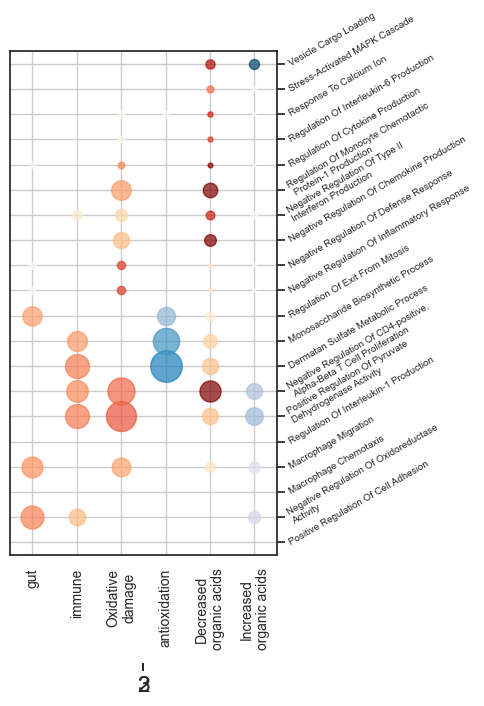

In [41]:
plot=termdf.drop_duplicates().fillna(0)
plot['label']=plot['Term'].str.split('(',expand=True)[0]
vmax=3

plt.figure(figsize=(5,8))
for i,j in enumerate(targetls):
    sx=str(j)
    if i==5 or i==3: 
        cmap='PuBu'
    else:
        cmap='OrRd'
    for i,index in enumerate(plot.index):
            plt.scatter(j,i, c=plot.loc[index,'logP'+sx], s=plot.loc[index,'Odds Ratio'+sx].astype(float)*1, alpha=0.7,
                            cmap=cmap,vmin=1.3,vmax=vmax)

    plt.yticks(range(len(plot)),listuu)
    plt.xlabel('')  
    plt.ylabel('')  
    plt.title('')  
plt.xticks(targetls,listyy,fontsize=10,rotation=90)

plt.xlim(-0.5,6-0.5)
plt.ylim(-0.5,len(plot)-0.5)
plt.xlabel('')
plt.gca().yaxis.set_ticks_position('right') 
plt.grid(True)  
plt.colorbar(shrink=0.,orientation='horizontal')
plt.title('')
plt.yticks(fontsize=7,rotation=30,rotation_mode='anchor', ha='left', va='center')
plt.tight_layout()
plt.savefig('Fig3B.pdf')
plt.show()

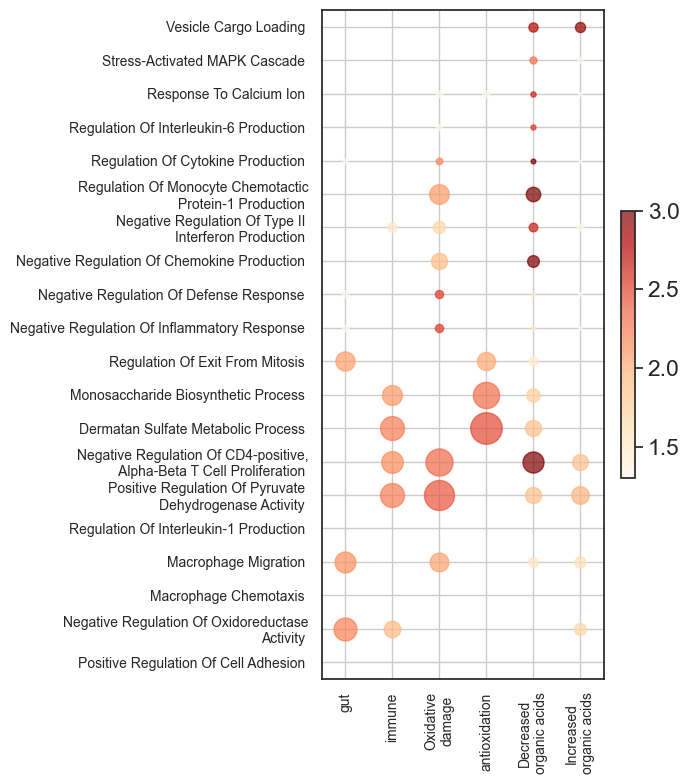

In [34]:
plot=termdf.drop_duplicates().fillna(0)
plot['label']=plot['Term'].str.split('(',expand=True)[0]
vmax=3

plt.figure(figsize=(7,8))
for i,j in enumerate(targetls):
    sx=str(j)
    if i==5 or i==3: 
        cmap='OrRd'
    else:
        cmap='OrRd'
    for i,index in enumerate(plot.index):
            plt.scatter(j,i, c=plot.loc[index,'logP'+sx], s=plot.loc[index,'Odds Ratio'+sx].astype(float)*1, alpha=0.7,
                            cmap=cmap,vmin=1.3,vmax=vmax)

    plt.yticks(range(len(plot)),listuu)
    plt.xlabel('')  
    plt.ylabel('')  
    plt.title('')  
plt.xticks(targetls,listyy,fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlim(-0.5,6-0.5)
plt.ylim(-0.5,len(plot)-0.5)
plt.xlabel('')
plt.grid(True)  
plt.colorbar(shrink=0.4)
plt.title('')
plt.tight_layout()
plt.savefig('Fig3Blegend.pdf')
plt.show()

In [51]:
OR['logOR']=np.log2(OR['OR'])

In [52]:
orrnk=OR[['gene','logOR']].set_index('gene').sort_values('logOR',ascending=False)

In [53]:
orrnk

,logOR
gene,
HERC2P2,52.901999
HERC2P2,52.901999
ASTL,52.901999
BMS1P22,52.901999
LOC390705,52.894466
...,...
POTEM,-2.000000
RSPH10B,-2.321928
NBPF1,-2.321928


## GO

In [15]:
resultdf[resultdf['p_value']<0.05]

,index,Unnamed: 0,geneloci,indicator,p_value,loc,gene
0,0,29,chr1-16976032-16976032-A-C-MST1P2,组织转麸胺酶抗体,0.023558,chr1-16976032,MST1P2
1,1,34,chr1-16976032-16976032-A-C-MST1P2,胰弹性蛋白酶,0.048116,chr1-16976032,MST1P2
2,2,60,chr7-48886193-48886193-G-A-ABCA13,解连蛋白,0.002345,chr7-48886193,ABCA13
3,3,84,chr15-21937964-21937964-A-G-LOC646214,麦胶蛋白抗体,0.012301,chr15-21937964,LOC646214
4,4,102,chr1-120539213-120539213-G-T-NOTCH2NLC,解连蛋白,0.037756,chr1-120539213,NOTCH2NLC
...,...,...,...,...,...,...,...
483,483,9467,chr1-145304787-145304787-G-T-NBPF25P,1. 己二酸,0.003685,chr1-145304787,NBPF25P
484,484,9468,chr1-145304787-145304787-G-T-NBPF25P,2. 辛二酸,0.046450,chr1-145304787,NBPF25P
485,485,9469,chr1-145304787-145304787-G-T-NBPF25P,3. 乙基丙二酸,0.015724,chr1-145304787,NBPF25P
486,486,9477,chr1-145304787-145304787-G-T-NBPF25P,11. 琥珀酸,0.021162,chr1-145304787,NBPF25P


In [23]:
resultdf

,index,Unnamed: 0,geneloci,indicator,p_value,loc,gene
0,0,29,chr1-16976032-16976032-A-C-MST1P2,组织转麸胺酶抗体,0.023558,chr1-16976032,MST1P2
1,1,34,chr1-16976032-16976032-A-C-MST1P2,胰弹性蛋白酶,0.048116,chr1-16976032,MST1P2
2,2,60,chr7-48886193-48886193-G-A-ABCA13,解连蛋白,0.002345,chr7-48886193,ABCA13
3,3,84,chr15-21937964-21937964-A-G-LOC646214,麦胶蛋白抗体,0.012301,chr15-21937964,LOC646214
4,4,102,chr1-120539213-120539213-G-T-NOTCH2NLC,解连蛋白,0.037756,chr1-120539213,NOTCH2NLC
...,...,...,...,...,...,...,...
483,483,9467,chr1-145304787-145304787-G-T-NBPF25P,1. 己二酸,0.003685,chr1-145304787,NBPF25P
484,484,9468,chr1-145304787-145304787-G-T-NBPF25P,2. 辛二酸,0.046450,chr1-145304787,NBPF25P
485,485,9469,chr1-145304787-145304787-G-T-NBPF25P,3. 乙基丙二酸,0.015724,chr1-145304787,NBPF25P
486,486,9477,chr1-145304787-145304787-G-T-NBPF25P,11. 琥珀酸,0.021162,chr1-145304787,NBPF25P


In [27]:
gene_sets=[GO_BP_23,GO_CC_23,GO_MF_23]

enr = gp.enrich(gene_list=resultdf[(resultdf['p_value']<0.05)]['gene'],
                             gene_sets=gene_sets,
                             outdir='/home2/zhenglijing/work_0511/GO/CHIP2/',
                             cutoff=1)

In [28]:
BP=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP2/gs_ind_0.human.enrichr.reports.txt',sep='\t')
BPf=BP[BP['P-value']<0.05
      ].sort_values('P-value')

In [29]:
BPls=BPf['Term'].tolist()

In [30]:
BPls

['Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)',
 'Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000561)',
 'Negative Regulation Of Alpha-Beta T Cell Proliferation (GO:0046642)',
 'Negative Regulation Of CD4-positive, Alpha-Beta T Cell Activation (GO:2000515)',
 'Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071637)',
 'Negative Regulation Of Chemokine Production (GO:0032682)',
 'Regulation Of Cytokine Production (GO:0001817)',
 'Regulation Of NIK/NF-kappaB Signaling (GO:1901222)',
 'Vesicle Cargo Loading (GO:0035459)',
 'Positive Regulation Of Gene Expression (GO:0010628)',
 'Negative Regulation Of Type II Interferon Production (GO:0032689)',
 'Regulation Of Protein Secretion (GO:0050708)',
 'Regulation Of Interleukin-6 Production (GO:0032675)',
 'Positive Regulation Of Cell Cycle Process (GO:0090068)',
 'Stress-Activated MAPK Cascade (GO:0051403)',
 'Establishment Of Protein Localization To Extracellular Region (G

In [31]:
CC=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP2/gs_ind_1.human.enrichr.reports.txt',sep='\t')
CCf=CC[CC['P-value']<0.05].sort_values('P-value')
CCls=CCf['Term'].tolist()
CCls

['Endocytic Vesicle Lumen (GO:0071682)',
 'Condensed Chromosome (GO:0000793)',
 'Asymmetric, Glutamatergic, Excitatory Synapse (GO:0098985)',
 'Symmetric Synapse (GO:0032280)',
 'Inhibitory Synapse (GO:0060077)',
 'Intracellular Vesicle (GO:0097708)',
 'MLL3/4 Complex (GO:0044666)',
 'GABA-ergic Synapse (GO:0098982)']

In [32]:
CCf

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
16,gs_ind_1,Endocytic Vesicle Lumen (GO:0071682),2/19,0.001385,0.084495,50.39071,331.66830,HP;SAA1
9,gs_ind_1,Condensed Chromosome (GO:0000793),2/59,0.012872,0.221803,15.29439,66.57234,FANCD2;TTN
2,gs_ind_1,"Asymmetric, Glutamatergic, Excitatory Synapse ...",1/5,0.014544,0.221803,114.91370,486.14760,NLGN4Y
52,gs_ind_1,Symmetric Synapse (GO:0032280),1/5,0.014544,0.221803,114.91370,486.14760,NLGN4Y
30,gs_ind_1,Inhibitory Synapse (GO:0060077),1/8,0.023172,0.267149,68.93412,259.52460,NLGN4Y
34,gs_ind_1,Intracellular Vesicle (GO:0097708),1/11,0.031725,0.267149,49.22857,169.87020,ABCA13
35,gs_ind_1,MLL3/4 Complex (GO:0044666),1/11,0.031725,0.267149,49.22857,169.87020,KMT2C
21,gs_ind_1,GABA-ergic Synapse (GO:0098982),1/17,0.048613,0.267149,31.31444,94.69039,NLGN4Y


In [33]:
MF=pd.read_csv('/home2/zhenglijing/work_0511/GO/CHIP2/gs_ind_2.human.enrichr.reports.txt',sep='\t')
MFf=MF[MF['P-value']<0.05].sort_values('P-value')
MFls=MFf['Term'].tolist()
MFls

['Protein Kinase Binding (GO:0019901)',
 'Endopeptidase Activity (GO:0004175)',
 'Telethonin Binding (GO:0031433)',
 'Arginine Binding (GO:0034618)',
 'Protein Tyrosine Kinase Binding (GO:1990782)',
 'UDP-xylosyltransferase Activity (GO:0035252)',
 'G-quadruplex DNA Binding (GO:0051880)',
 'FMN Binding (GO:0010181)',
 'Neurexin Family Protein Binding (GO:0042043)',
 'Kinase Binding (GO:0019900)',
 'DNA Replication Origin Binding (GO:0003688)',
 'Histone H3K4 Methyltransferase Activity (GO:0042800)',
 'MAP Kinase Kinase Activity (GO:0004708)',
 'Muscle Alpha-Actinin Binding (GO:0051371)']

In [92]:
BPchoose=['Activation Of GTPase Activity (GO:0090630)','Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000562)','Positive Regulation Of Notch Signaling Pathway (GO:0045747)','Negative Regulation Of Alpha-Beta T Cell Proliferation (GO:0046642)',
         'Stress-Activated MAPK Cascade (GO:0051403)','Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation (GO:2000561)','Negative Regulation Of CD4-positive, Alpha-Beta T Cell Activation (GO:2000515)','Regulation Of Monocyte Chemotactic Protein-1 Production (GO:0071637)','Regulation Of NIK/NF-kappaB Signaling (GO:1901222)',
         'Regulation Of Cytokine Production (GO:0001817)','Regulation Of Pyruvate Dehydrogenase Activity (GO:1904182/GO:1904184)','Regulation Of GTPase Activity (GO:0043547/GO:0090630)','Stress-Activated MAPK Cascade (GO:0051403)','Response To Calcium Ion (GO:0051592)',]
CCMFchoose=['Asymmetric, Glutamatergic, Excitatory Synapse (GO:0098985)',
            'Symmetric Synapse (GO:0032280)',
           'Inhibitory Synapse (GO:0060077)',
           'Neurexin Family Protein Binding (GO:0042043)',
           'Voltage-Gated Chloride Channel Activity (GO:0005247)',
           'Carbonyl Reductase (NADPH) Activity (GO:0004090)',
           'Inositol 1,4,5 Trisphosphate Binding (GO:0070679)',
           'Cyclin-Dependent Protein Serine/Threonine Kinase Activity (GO:0004693)']

In [93]:
BP[BP['Term'].isin(BPchoose)]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
133,gs_ind_0,Negative Regulation Of Alpha-Beta T Cell Proli...,2/9,0.000402,0.057132,100.628900,786.79210,LGALS9;LGALS9C
136,gs_ind_0,"Negative Regulation Of CD4-positive, Alpha-Bet...",2/11,0.000612,0.057132,79.432990,587.74770,LGALS9;LGALS9C
137,gs_ind_0,"Negative Regulation Of CD4-positive, Alpha-Bet...",2/6,0.000169,0.057132,167.749100,1457.35200,LGALS9;LGALS9C
270,gs_ind_0,Positive Regulation Of Notch Signaling Pathway...,2/33,0.005598,0.185952,23.919980,124.03170,NOTCH2NLA;NOTCH2NLC
327,gs_ind_0,"Regulation Of CD4-positive, Alpha-Beta T Cell ...",2/9,0.000402,0.057132,100.628900,786.79210,LGALS9;LGALS9C
345,gs_ind_0,Regulation Of Cytokine Production (GO:0001817),3/167,0.019116,0.185952,6.488018,25.67461,LGALS9;SAA1;C1QTNF3
379,gs_ind_0,Regulation Of Monocyte Chemotactic Protein-1 P...,2/11,0.000612,0.057132,79.432990,587.74770,LGALS9;C1QTNF3
380,gs_ind_0,Regulation Of NIK/NF-kappaB Signaling (GO:1901...,3/83,0.002811,0.164094,13.335010,78.33260,LGALS9;C1QTNF3;LIMS1
414,gs_ind_0,Response To Calcium Ion (GO:0051592),3/106,0.005588,0.185952,10.355300,53.71399,TTN;RASA4;TRPC3
442,gs_ind_0,Stress-Activated MAPK Cascade (GO:0051403),2/42,0.008953,0.185952,18.592970,87.67963,LGALS9;MAP2K3


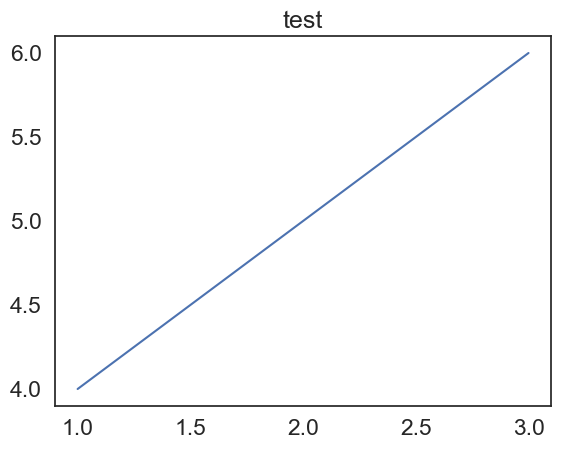

In [94]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = '/home2/zhenglijing/work/Arial.ttf'font = FontProperties(fname=font_path)

plt.plot([1, 2, 3], [4, 5, 6])
plt.title('test', fontproperties=font)
plt.show()

In [95]:
plot['Overlap']

NameError: name 'plot' is not defined

In [96]:
def fraction_to_float(fraction_str):
    try:
        numerator, denominator = map(float, fraction_str.split('/'))
        return numerator / denominator
    except:
        return float(fraction_str)
plot['Overlap_float'] = plot['Overlap'].apply(fraction_to_float)

NameError: name 'plot' is not defined

In [97]:
plot

NameError: name 'plot' is not defined

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCop

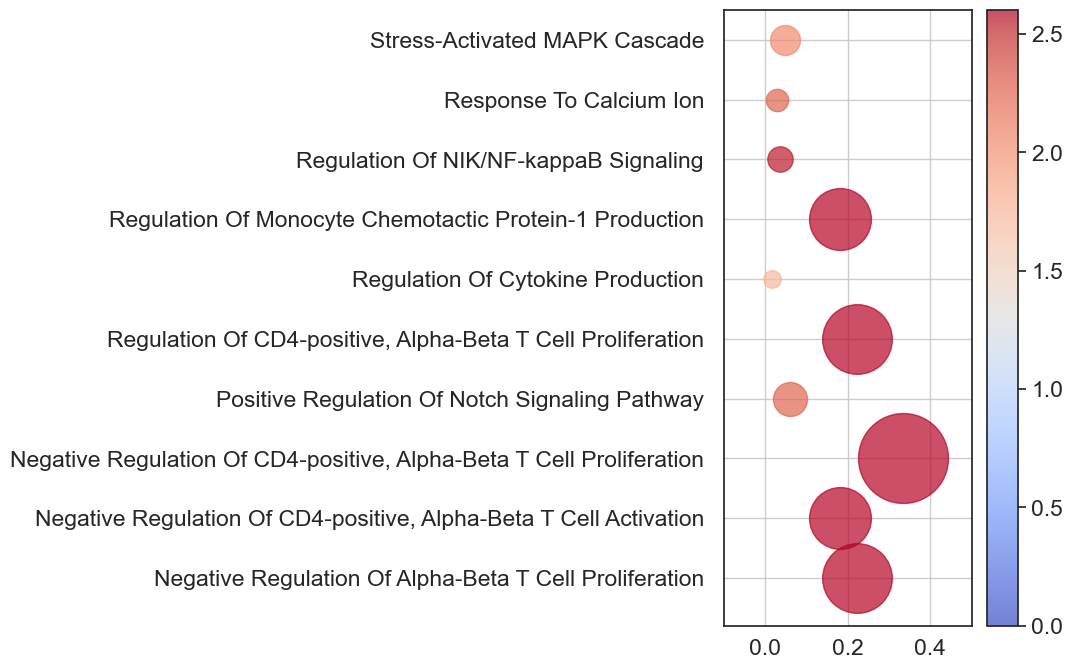

In [98]:
plt.rcParams['font.family'] = 'Arial'
plotBP=BP[BP['Term'].isin(BPchoose)]
plotBP['label']=plotBP['Term'].str.split('(',expand=True)[0]
plotBP['logP']=-np.log10(plotBP['P-value'])
plotBP['Overlap_float'] = plotBP['Overlap'].apply(fraction_to_float)
vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,8))
for i,index in enumerate(plotBP.index):
            plt.scatter(plotBP.loc[index,'Overlap_float'],i, c=plotBP.loc[index,'logP'], s=plotBP.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotBP)),plotBP['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.ylim(-0.8,len(plotBP)-0.5)
plt.xlim(-0.1,0.5)
plt.grid(True)  
plt.colorbar()
plt.tight_layout()
plt.show()

In [99]:
CC[BP['Term'].isin(BPchoose)]

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes


/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCop

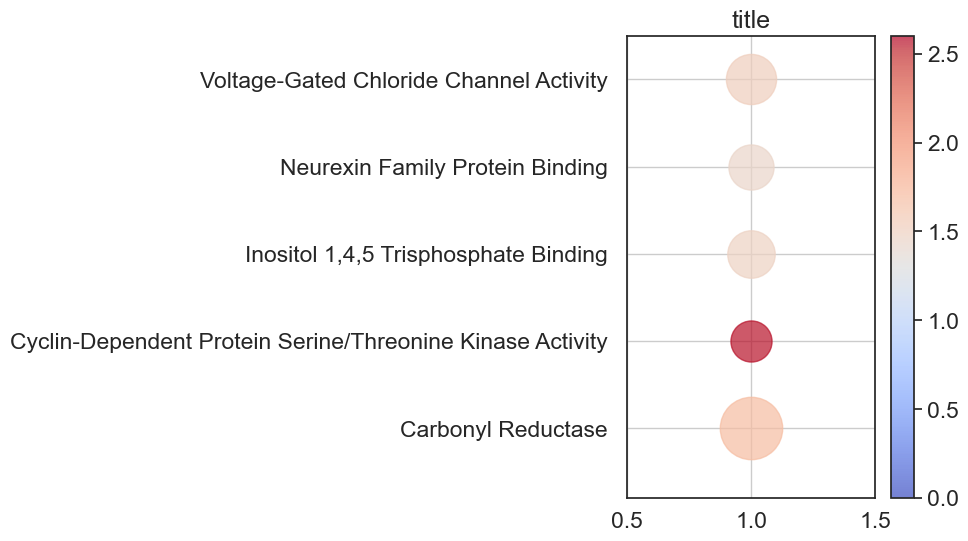

In [100]:
plt.rcParams['font.family'] = 'Arial'
plotMF=MF[MF['Term'].isin(CCMFchoose)]
plotMF['label']=plotMF['Term'].str.split('(',expand=True)[0]
plotMF['logP']=-np.log10(plotMF['P-value'])
plotMF['Overlap_float'] = plotMF['Overlap'].apply(fraction_to_float)

vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,6))

for i,index in enumerate(plotMF.index):
            plt.scatter(1,i, c=plotMF.loc[index,'logP'], s=plotMF.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotMF)),plotMF['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.xlim(0.5,1.5)
plt.ylim(-0.8,len(plotMF)-0.5)
plt.grid(True)  
plt.colorbar()
plt.title('title')
plt.tight_layout()
plt.show()

In [101]:
CCf[CCf['Term'].isin(CCMFchoose)]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
2,gs_ind_1,"Asymmetric, Glutamatergic, Excitatory Synapse ...",1/5,0.016896,0.113630,98.61616,402.4204,NLGN4Y
47,gs_ind_1,Symmetric Synapse (GO:0032280),1/5,0.016896,0.113630,98.61616,402.4204,NLGN4Y
29,gs_ind_1,Inhibitory Synapse (GO:0060077),1/8,0.026899,0.158406,59.15758,213.8939,NLGN4Y


/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCop

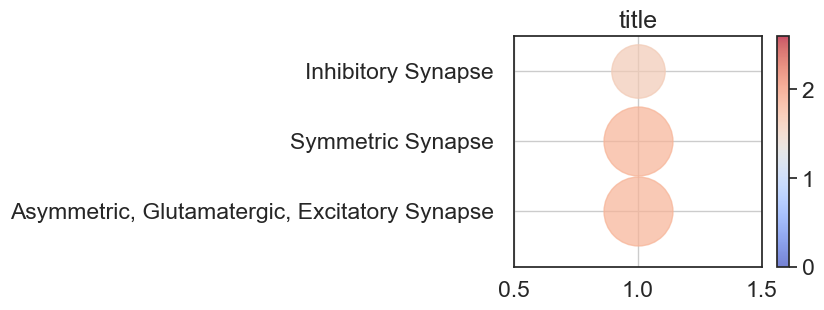

In [102]:
plt.rcParams['font.family'] = 'Arial'
plotCC=CCf[CCf['Term'].isin(CCMFchoose)]
plotCC['label']=plotCC['Term'].str.split('(',expand=True)[0]
plotCC['logP']=-np.log10(plotCC['P-value'])
plotCC['Overlap_float'] = plotCC['Overlap'].apply(fraction_to_float)
vmax=-np.log10(0.05)*2
plt.figure(figsize=(4,3))

for i,index in enumerate(plotCC.index):
            plt.scatter(1,i, c=plotCC.loc[index,'logP'], s=plotCC.loc[index,'Odds Ratio'].astype(float)*25, alpha=0.7,
                            cmap='coolwarm',vmin=0,vmax=vmax)

plt.yticks(range(len(plotCC)),plotCC['label'])
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.xlim(0.5,1.5)
plt.ylim(-0.8,len(plotCC)-0.5)
plt.grid(True)  
plt.colorbar()
plt.title('title')
plt.tight_layout()
plt.show()

In [103]:
plot_BPCCMF=pd.concat([plotBP,plotCC,plotMF]).reset_index()
plot_BPCCMF

,index,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,label,logP,Overlap_float
0,133,gs_ind_0,Negative Regulation Of Alpha-Beta T Cell Proli...,2/9,0.000402,0.057132,100.62890,786.7921,LGALS9;LGALS9C,Negative Regulation Of Alpha-Beta T Cell Proli...,3.395641,0.222222
1,136,gs_ind_0,"Negative Regulation Of CD4-positive, Alpha-Bet...",2/11,0.000612,0.057132,79.43299,587.7477,LGALS9;LGALS9C,"Negative Regulation Of CD4-positive, Alpha-Bet...",3.213471,0.181818
2,137,gs_ind_0,"Negative Regulation Of CD4-positive, Alpha-Bet...",2/6,0.000169,0.057132,167.74910,1457.3520,LGALS9;LGALS9C,"Negative Regulation Of CD4-positive, Alpha-Bet...",3.773015,0.333333
3,270,gs_ind_0,Positive Regulation Of Notch Signaling Pathway...,2/33,0.005598,0.185952,23.91998,124.0317,NOTCH2NLA;NOTCH2NLC,Positive Regulation Of Notch Signaling Pathway,2.251936,0.060606
4,327,gs_ind_0,"Regulation Of CD4-positive, Alpha-Beta T Cell ...",2/9,0.000402,0.057132,100.62890,786.7921,LGALS9;LGALS9C,"Regulation Of CD4-positive, Alpha-Beta T Cell ...",3.395641,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,gs_ind_2,Carbonyl Reductase (NADPH) Activity (GO:0004090),1/6,0.020242,0.200305,80.68044,314.6551,DHRS4L1,Carbonyl Reductase,1.693756,0.166667
14,13,gs_ind_2,Cyclin-Dependent Protein Serine/Threonine Kina...,2/23,0.002741,0.105151,35.06953,206.8859,CDK11A;CDK11B,Cyclin-Dependent Protein Serine/Threonine Kina...,2.562036,0.086957
15,33,gs_ind_2,"Inositol 1,4,5 Trisphosphate Binding (GO:0070679)",1/10,0.033512,0.200305,46.69697,158.5756,TRPC3,"Inositol 1,4,5 Trisphosphate Binding",1.474796,0.100000
16,43,gs_ind_2,Neurexin Family Protein Binding (GO:0042043),1/11,0.036802,0.200305,42.24675,139.5070,NLGN4Y,Neurexin Family Protein Binding,1.434125,0.090909


In [104]:
list(plot_BPCCMF['label'])

['Negative Regulation Of Alpha-Beta T Cell Proliferation ',
 'Negative Regulation Of CD4-positive, Alpha-Beta T Cell Activation ',
 'Negative Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation ',
 'Positive Regulation Of Notch Signaling Pathway ',
 'Regulation Of CD4-positive, Alpha-Beta T Cell Proliferation ',
 'Regulation Of Cytokine Production ',
 'Regulation Of Monocyte Chemotactic Protein-1 Production ',
 'Regulation Of NIK/NF-kappaB Signaling ',
 'Response To Calcium Ion ',
 'Stress-Activated MAPK Cascade ',
 'Asymmetric, Glutamatergic, Excitatory Synapse ',
 'Symmetric Synapse ',
 'Inhibitory Synapse ',
 'Carbonyl Reductase ',
 'Cyclin-Dependent Protein Serine/Threonine Kinase Activity ',
 'Inositol 1,4,5 Trisphosphate Binding ',
 'Neurexin Family Protein Binding ',
 'Voltage-Gated Chloride Channel Activity ']

In [248]:
listyticks=['Negative Regulation Of \nAlpha-Beta T Cell Proliferation ',
 'Negative Regulation Of CD4-positive,\n Alpha-Beta T Cell Activation ',
 'Negative Regulation Of CD4-positive,\n Alpha-Beta T Cell Proliferation ',
 'Positive Regulation Of\nNotch Signaling Pathway ',
 'Regulation Of CD4-positive,\n Alpha-Beta T Cell Proliferation ',
 'Regulation Of Cytokine Production ',
 'Regulation Of Monocyte\n Chemotactic Protein-1 Production ',
 'Regulation Of NIK/NF-kappaB Signaling ',
 'Response To Calcium Ion ',
 'Stress-Activated MAPK Cascade ',
 'Asymmetric, Glutamatergic,\n Excitatory Synapse ',
 'Symmetric Synapse ',
 'Inhibitory Synapse ',
 'Carbonyl Reductase ',
 'Cyclin-Dependent Protein Serine\nThreonine Kinase Activity ',
 'Inositol 1,4,5 Trisphosphate Binding ',
 'Neurexin Family Protein Binding ',
 'Voltage-Gated Chloride Channel Activity ']

In [249]:
len(plot_BPCCMF)

18

In [250]:
cbar=plt.colorbar(shrink=0.3,)
cbar.set_label("-log₁₀P", size=13)
cbar.ax.tick_params(labelsize=10) 
ticks = [0,1,2,]
cbar.set_ticks(ticks)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 640x480 with 0 Axes>

/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home2/zhenglijing/program/ENTER/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


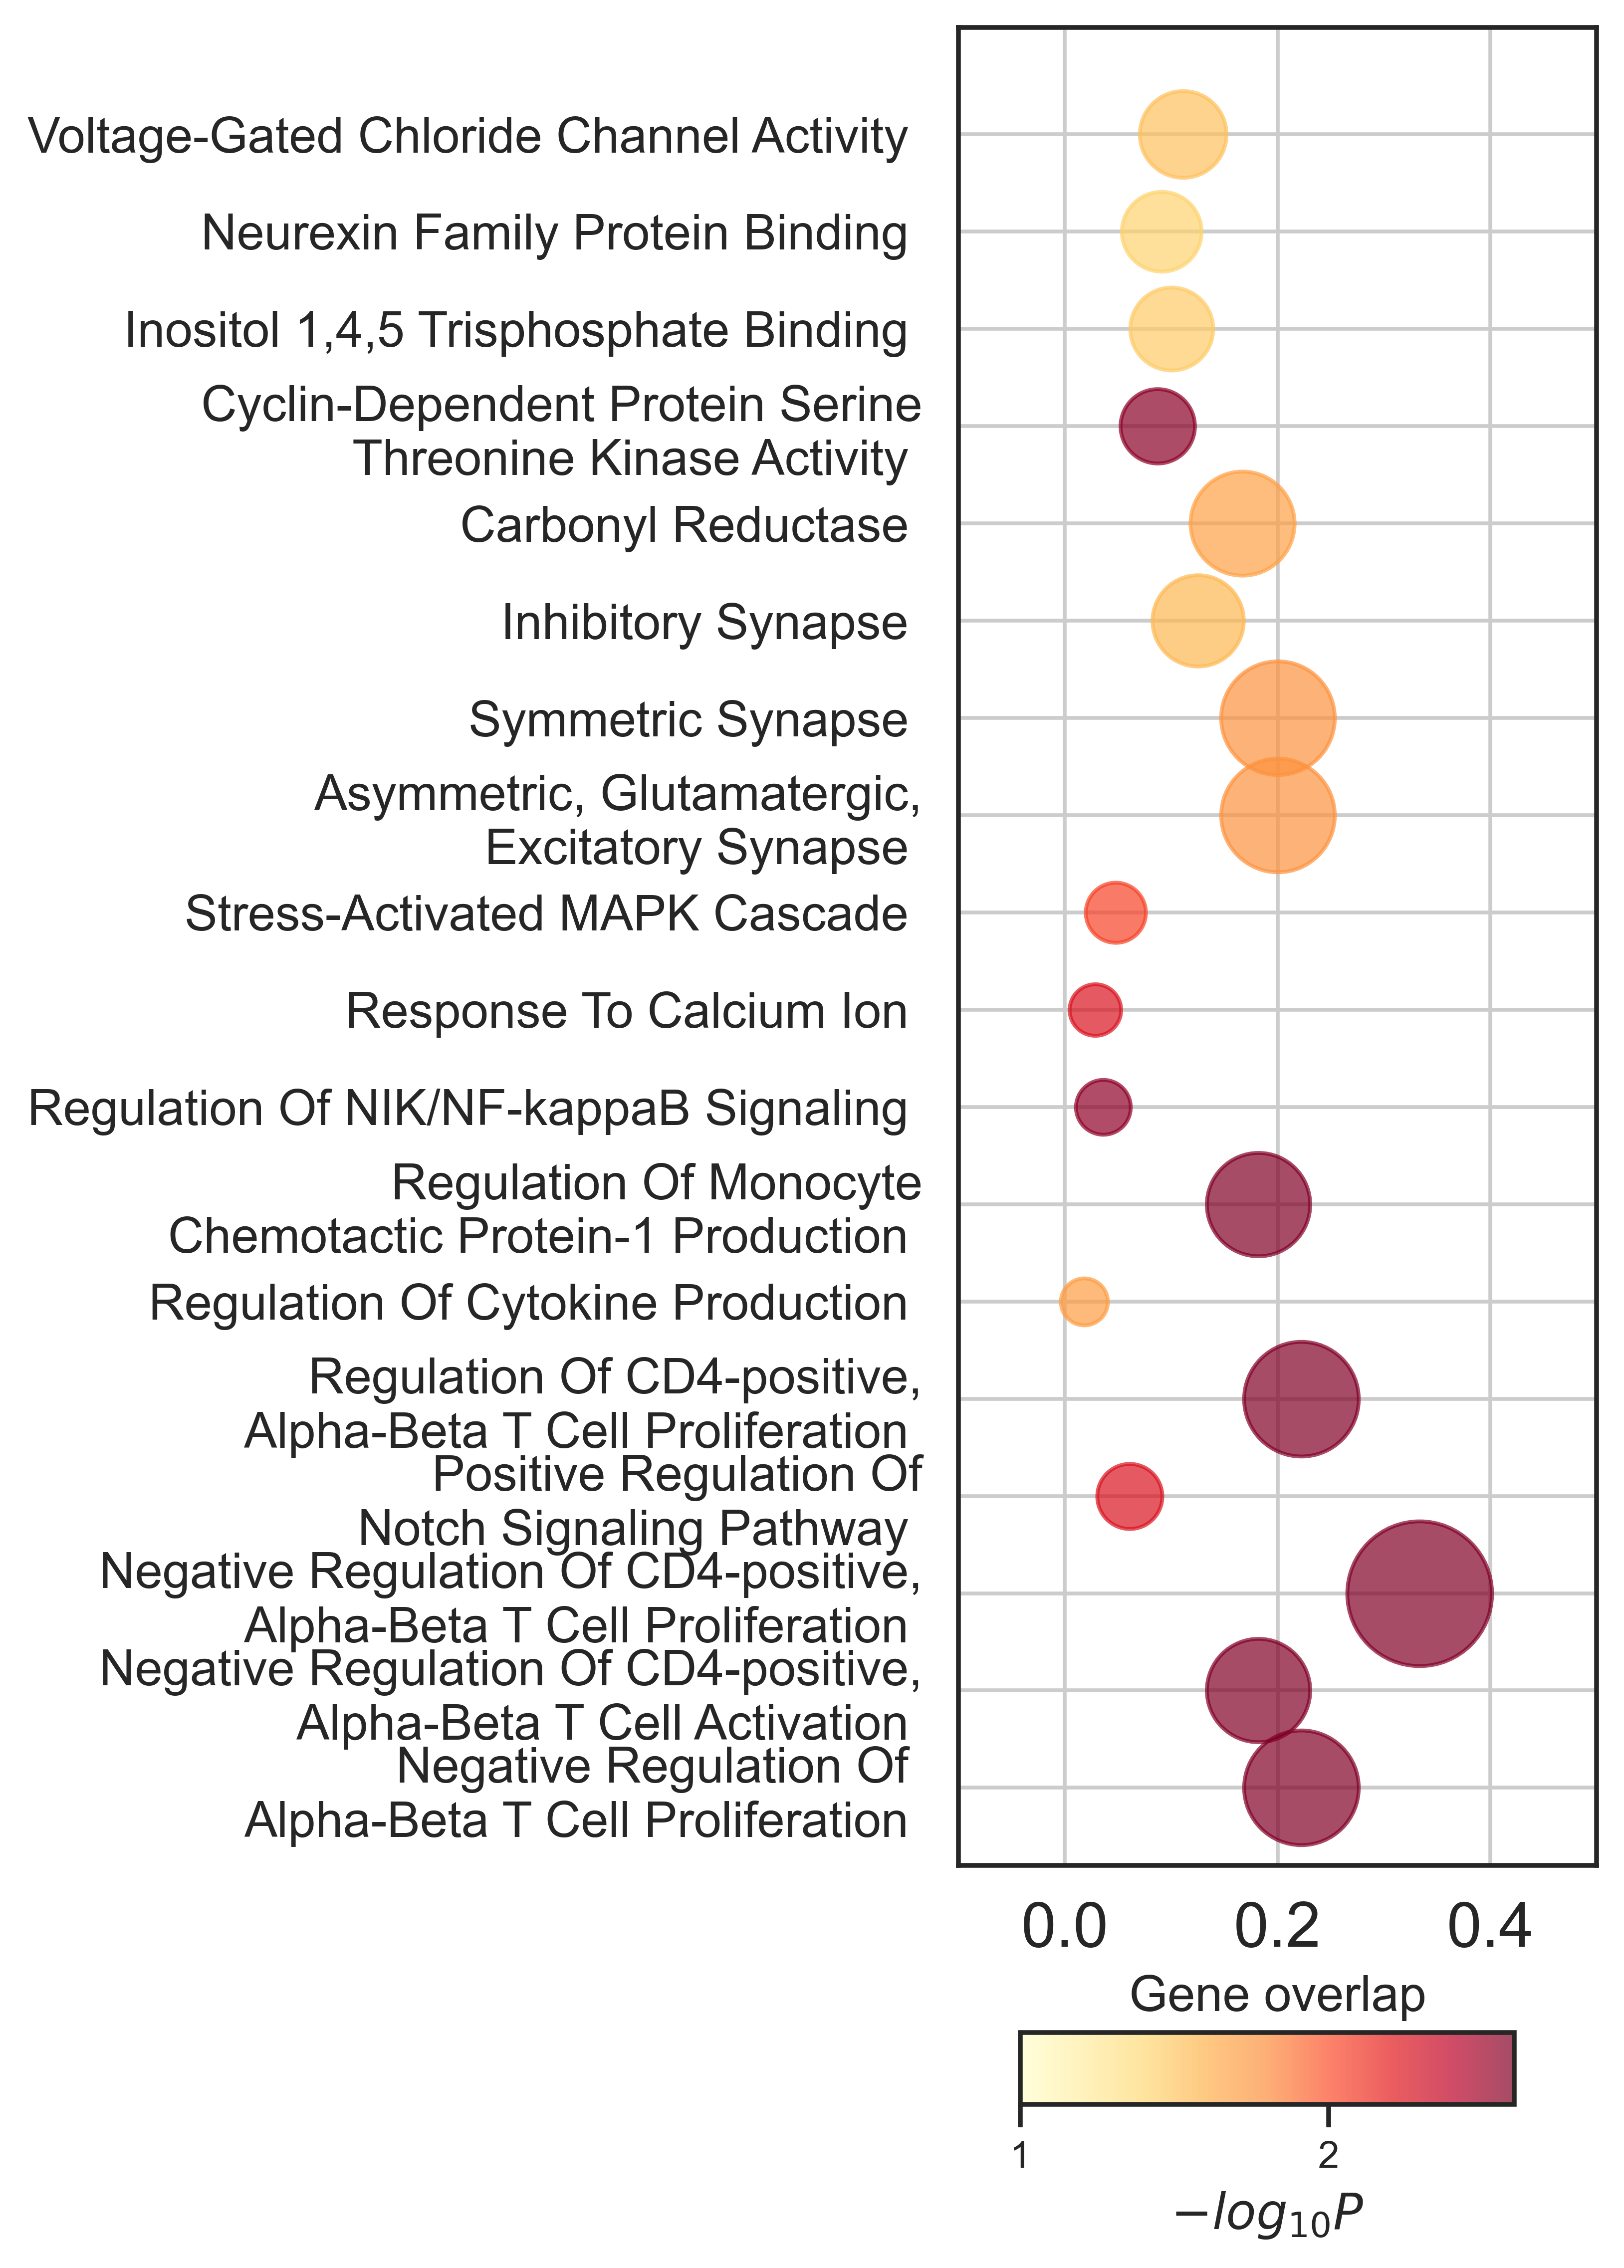

In [251]:
plt.rcParams['font.family'] = 'Arial'

vmax=-np.log10(0.05)*2
plt.figure(figsize=(3,8.7),dpi=550)

for i,index in enumerate(plot_BPCCMF.index):
            plt.scatter(plot_BPCCMF.loc[index,'Overlap_float'],i, c=plot_BPCCMF.loc[index,'logP'],
                        s=plot_BPCCMF.loc[index,'Odds Ratio'].astype(float)*8+100, alpha=0.7,
                            cmap='YlOrRd',vmin=1,vmax=vmax)

plt.yticks(range(len(plot_BPCCMF)),listyticks,fontsize=13)
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.ylim(-0.8,len(plot_BPCCMF)+0.1)
plt.xlabel('Gene overlap',fontsize=13)
plt.xlim(-0.1,0.5)
plt.grid(True)  

cbar_ax = plt.axes([0.2, 0.01, 0.6, 0.03])
cbar=plt.colorbar(shrink=0.3,orientation='horizontal',cax=cbar_ax,)
cbar.set_label(r"$-log_{10}P$", size=13)
cbar.ax.tick_params(labelsize=10) 
ticks = [1,2,]
cbar.set_ticks(ticks)



plt.tight_layout()
plt.show()

## BP 

In [65]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_BP_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-06-15 19:21:22,907 [INFO] Input gene rankings contains duplicated IDs
2025-06-15 19:21:22,915 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-06-15 19:21:22,916 [INFO] Parsing data files for GSEA.............................
2025-06-15 19:21:22,941 [INFO] 4933 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-06-15 19:21:22,942 [INFO] 0474 gene_sets used for further statistical testing.....
2025-06-15 19:21:22,943 [INFO] Start to run GSEA...Might take a while..................
2025-06-15 19:21:24,169 [INFO] Congratulations. GSEApy runs successfully................



In [66]:
import pandas as pd

df = pre_res.res2d
filtered_df = df[(df['NOM p-val'] < 0.05)&(df['NES'] > 0)]

filtered_df

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
4,prerank,Sulfur Compound Biosynthetic Process (GO:0044272),0.993025,1.330798,0.006042,0.30002,0.137,1/2,0.78%,DSE
5,prerank,Monocarboxylic Acid Biosynthetic Process (GO:0...,0.993019,1.324887,0.0,0.32334,0.25,1/3,0.78%,DSE
6,prerank,Epithelial Cell Migration (GO:0010631),0.987379,1.312409,0.005908,0.715173,0.552,1/2,0.96%,PIK3CA
7,prerank,Insulin Receptor Signaling Pathway (GO:0008286),0.972659,1.304228,0.016973,0.940398,0.729,1/2,0.96%,PIK3CA
8,prerank,Positive Regulation Of Autophagy (GO:0010508),0.973388,1.294556,0.02406,1.0,0.872,1/2,2.35%,TRIM34
9,prerank,Positive Regulation Of Cellular Catabolic Proc...,0.973388,1.294556,0.02406,1.0,0.872,1/2,2.35%,TRIM34
13,prerank,Phosphatidylinositol Phosphate Biosynthetic Pr...,0.972659,1.286098,0.017804,1.0,0.931,1/2,0.96%,PIK3CA
14,prerank,Sensory Perception Of Chemical Stimulus (GO:00...,0.962878,1.283641,0.033071,1.0,0.947,1/2,1.91%,OR8I2
15,prerank,Phosphatidylinositol Biosynthetic Process (GO:...,0.945763,1.269002,0.016949,1.0,0.988,2/4,4.18%,PIK3CA;CWH43
19,prerank,Positive Regulation Of Plasma Membrane Bounded...,0.934441,1.253447,0.043257,1.0,0.999,2/3,2.70%,PIK3CA;CROCC


In [67]:
path='/home2/zhenglijing/work/GSEA/BP_significant.csv'
filtered_df.to_csv(path)

In [395]:
listBP=list(filtered_df['Term'].unique())
listBP

['Short-Chain Fatty Acid Metabolic Process (GO:0046459)',
 'Sulfur Compound Biosynthetic Process (GO:0044272)',
 'Monocarboxylic Acid Biosynthetic Process (GO:0072330)',
 'Regulation Of Cellular Localization (GO:0060341)',
 'Regulation Of Protein Localization (GO:0032880)',
 'Modulation By Symbiont Of Entry Into Host (GO:0052372)',
 'Positive Regulation Of Cellular Catabolic Process (GO:0031331)',
 'Positive Regulation Of Autophagy (GO:0010508)',
 'Sensory Perception Of Chemical Stimulus (GO:0007606)',
 'Phosphatidylinositol Phosphate Biosynthetic Process (GO:0046854)',
 'Insulin Receptor Signaling Pathway (GO:0008286)',
 'Positive Regulation Of Defense Response To Virus By Host (GO:0002230)',
 'Positive Regulation Of I-kappaB kinase/NF-kappaB Signaling (GO:0043123)',
 'Regulation Of Viral Entry Into Host Cell (GO:0046596)',
 'Epithelial Cell Migration (GO:0010631)',
 'Regulation Of Viral Life Cycle (GO:1903900)',
 'Antiviral Innate Immune Response (GO:0140374)',
 'Regulation Of Transc

In [137]:
listbppathway=['Leukotriene Biosynthetic Process (GO:0019370)',
 'Leukotriene D4 Biosynthetic Process (GO:1901750)',
 'Fatty Acid Derivative Biosynthetic Process (GO:1901570)',
 'Leukotriene D4 Metabolic Process (GO:1901748)',
 'Positive Regulation Of Cellular Catabolic Process (GO:0031331)',
 'Positive Regulation Of Autophagy (GO:0010508)',
 'Negative Regulation Of Reproductive Process (GO:2000242)',
 'Sensory Perception Of Chemical Stimulus (GO:0007606)',
 'Positive Regulation Of DNA-binding Transcription Factor Activity (GO:0051091)',
 'Regulation Of Viral Entry Into Host Cell (GO:0046596)',
 'Positive Regulation Of NF-kappaB Transcription Factor Activity (GO:0051092)']

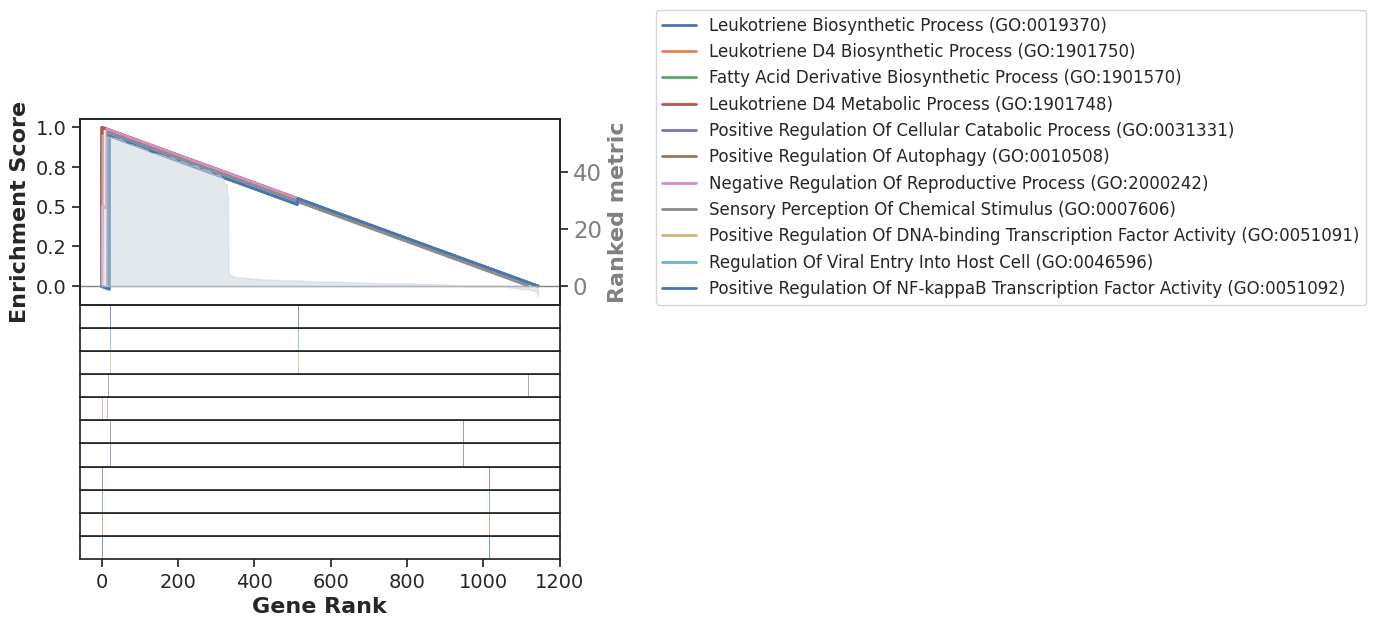

In [138]:
axs = pre_res.plot(terms=listbppathway,
                   legend_kws={'loc': (1.2, 0),'fontsize':12}, 
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(6,6)
                  )


## CC

In [122]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_CC_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    ) 

2025-06-15 21:46:51,350 [INFO] Input gene rankings contains duplicated IDs
2025-06-15 21:46:51,358 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-06-15 21:46:51,359 [INFO] Parsing data files for GSEA.............................
2025-06-15 21:46:51,365 [INFO] 0406 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-06-15 21:46:51,366 [INFO] 0068 gene_sets used for further statistical testing.....
2025-06-15 21:46:51,367 [INFO] Start to run GSEA...Might take a while..................
2025-06-15 21:46:51,594 [INFO] Congratulations. GSEApy runs successfully................



In [123]:
import pandas as pd

df = pre_res.res2d
filtered_df2 = df[(df['NOM p-val'] < 0.05)&(df['NES'] > 0)]


filtered_df2

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes


In [401]:
listCC=list(filtered_df2['Term'].unique())
listCC

[]

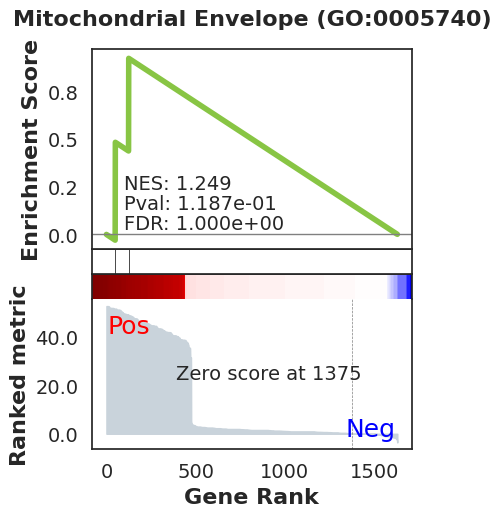

In [40]:
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.5

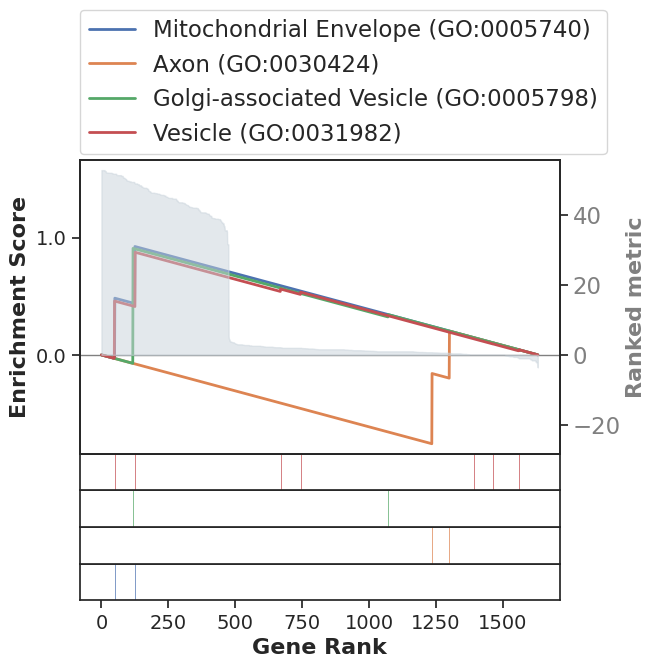

In [41]:
axs = pre_res.plot(terms=terms[1:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )


## MF

In [124]:
pre_res = gp.prerank(rnk=orrnk, # or rnk = rnk,
                     gene_sets=GO_MF_23,
                     threads=4,
                     min_size=2,
                     max_size=5000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2025-06-15 21:47:29,677 [INFO] Input gene rankings contains duplicated IDs
2025-06-15 21:47:29,684 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-06-15 21:47:29,685 [INFO] Parsing data files for GSEA.............................
2025-06-15 21:47:29,692 [INFO] 1051 gene_sets have been filtered out when max_size=5000 and min_size=2
2025-06-15 21:47:29,693 [INFO] 0096 gene_sets used for further statistical testing.....
2025-06-15 21:47:29,694 [INFO] Start to run GSEA...Might take a while..................
2025-06-15 21:47:29,976 [INFO] Congratulations. GSEApy runs successfully................



In [125]:
import pandas as pd

df = pre_res.res2d
filtered_df3 = df[(df['NOM p-val']< 0.05)&(df['NES'] > 0)]

filtered_df3

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
4,prerank,Kinase Activity (GO:0016301),0.972659,1.286098,0.017804,0.699227,0.577,1/2,0.96%,PIK3CA
5,prerank,Phosphatidylinositol Kinase Activity (GO:0052742),0.972659,1.286098,0.017804,0.699227,0.577,1/2,0.96%,PIK3CA


In [126]:
listMF=list(filtered_df3['Term'].unique())
listMF

['Kinase Activity (GO:0016301)',
 'Phosphatidylinositol Kinase Activity (GO:0052742)']

In [127]:
filtered_dfb=filtered_df3[filtered_df3['Term'].isin(['GTPase Activator Activity (GO:0005096)',
'Cytokine Activity (GO:0005125)',

'Ubiquitin-Protein Transferase Activity (GO:0004842)',

'Calcium Ion Transmembrane Transporter Activity (GO:0015085)'])]

## cMSigDB_Hallmark_2020

In [128]:
len(orrnk)

1149

In [129]:
for i in ['MSigDB_Hallmark_2020']:
    pre_res_7= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=1,
                         max_size=10000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-06-15 21:47:31,216 [INFO] Input gene rankings contains duplicated IDs
2025-06-15 21:47:31,223 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-06-15 21:47:31,224 [INFO] Parsing data files for GSEA.............................
2025-06-15 21:47:31,225 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-06-15 21:47:31,271 [INFO] 0013 gene_sets have been filtered out when max_size=10000 and min_size=1
2025-06-15 21:47:31,273 [INFO] 0037 gene_sets used for further statistical testing.....
2025-06-15 21:47:31,274 [INFO] Start to run GSEA...Might take a while..................
2025-06-15 21:47:31,436 [INFO] Start to generate gseapy reports, and produce figures...
2025-06-15 21:47:31,437 [INFO] Congratulations. GSEApy runs successfully................



In [130]:
dfhallmark= pre_res_7.res2d
hallmark_df = dfhallmark[(dfhallmark['NOM p-val']< 0.05)&(dfhallmark['NES'] > 0)]

hallmark_df

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
1,prerank,Complement,0.977332,1.296596,0.012712,0.359278,0.354,2/2,2.44%,PIK3CA;CFH


In [131]:
hallmark_df['Term'].tolist()

['Complement']

In [132]:
filtered_dfc=hallmark_df

##  KEGG_2021_Human

In [133]:
for i in ['KEGG_2021_Human']:
    pre_res_6= gp.prerank(rnk=orrnk, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=1,
                         max_size=5000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=i, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )

2025-06-15 21:47:32,191 [INFO] Input gene rankings contains duplicated IDs
2025-06-15 21:47:32,199 [WARNING] Duplicated values found in preranked stats: 56.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-06-15 21:47:32,200 [INFO] Parsing data files for GSEA.............................
2025-06-15 21:47:32,201 [INFO] Enrichr library gene sets already downloaded in: /home2/zhenglijing/.cache/gseapy, use local file
2025-06-15 21:47:32,290 [INFO] 0124 gene_sets have been filtered out when max_size=5000 and min_size=1
2025-06-15 21:47:32,291 [INFO] 0196 gene_sets used for further statistical testing.....
2025-06-15 21:47:32,292 [INFO] Start to run GSEA...Might take a while..................
2025-06-15 21:47:38,432 [INFO] Start to generate gseapy reports, and produce figures...
2025-06-15 21:47:38,433 [INFO] Congratulations. GSEApy runs successfully................



In [134]:
dfKEGG= pre_res_6.res2d
KEGG_df = dfKEGG[(dfKEGG['NOM p-val']< 0.05)&(dfKEGG['NES'] > 0)]

KEGG_df


,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
1,prerank,Glycosaminoglycan biosynthesis,0.993031,1.331374,0.018036,0.322076,0.145,1/1,0.78%,DSE
2,prerank,Human cytomegalovirus infection,0.987372,1.316349,0.0,0.558857,0.415,1/3,0.96%,PIK3CA
3,prerank,JAK-STAT signaling pathway,0.991282,1.314552,0.00292,0.421247,0.446,1/2,0.96%,PIK3CA
4,prerank,MicroRNAs in cancer,0.987379,1.312409,0.005908,0.379395,0.486,1/2,0.96%,PIK3CA
5,prerank,Breast cancer,0.991289,1.306859,0.009363,0.064057,0.571,1/1,0.96%,PIK3CA
...,...,...,...,...,...,...,...,...,...,...
44,prerank,Toll-like receptor signaling pathway,0.938996,1.265184,0.040353,0.206384,0.939,1/3,0.96%,PIK3CA
46,prerank,Ras signaling pathway,0.96681,1.262844,0.026471,0.205629,0.942,1/2,0.96%,PIK3CA
47,prerank,Osteoclast differentiation,0.949072,1.260039,0.023316,0.212985,0.95,1/3,0.96%,PIK3CA
49,prerank,Malaria,0.964161,1.259083,0.03962,0.208302,0.951,1/2,2.87%,GYPA


In [135]:
KEGG_df['Term'].tolist()

['Glycosaminoglycan biosynthesis',
 'Human cytomegalovirus infection',
 'JAK-STAT signaling pathway',
 'MicroRNAs in cancer',
 'Breast cancer',
 'Regulation of lipolysis in adipocytes',
 'Relaxin signaling pathway',
 'Glioma',
 'Chronic myeloid leukemia',
 'Gastric cancer',
 'Central carbon metabolism in cancer',
 'Viral carcinogenesis',
 'Prolactin signaling pathway',
 'Type II diabetes mellitus',
 'Melanoma',
 'VEGF signaling pathway',
 'Cholinergic synapse',
 'ErbB signaling pathway',
 'Renal cell carcinoma',
 'Measles',
 'Hepatocellular carcinoma',
 'AGE-RAGE signaling pathway in diabetic complications',
 'C-type lectin receptor signaling pathway',
 'Fluid shear stress and atherosclerosis',
 'Colorectal cancer',
 'GnRH secretion',
 'Pancreatic cancer',
 'Acute myeloid leukemia',
 'Signaling pathways regulating pluripotency of stem cells',
 'Phospholipase D signaling pathway',
 'Kaposi sarcoma-associated herpesvirus infection',
 'HIF-1 signaling pathway',
 'Propanoate metabolism',
 

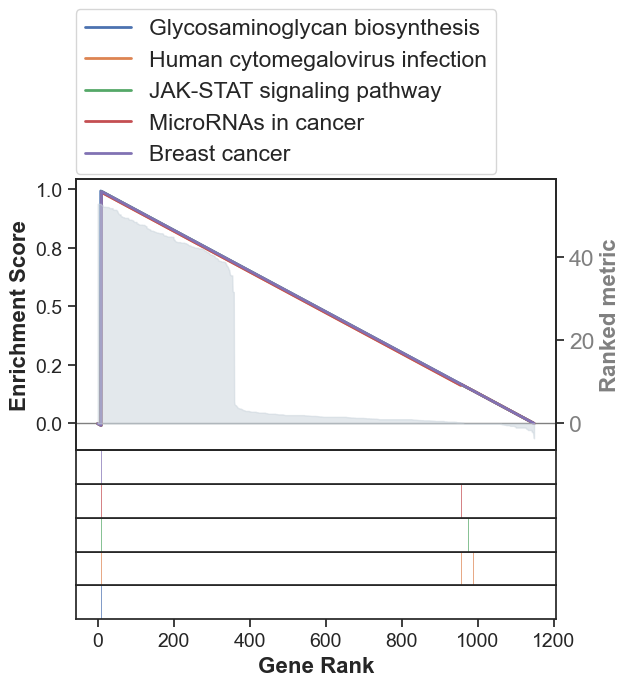

In [136]:
terms = KEGG_df['Term'].tolist()
axs = pre_res_6.plot(terms=terms[:5],
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )
